0.11.2


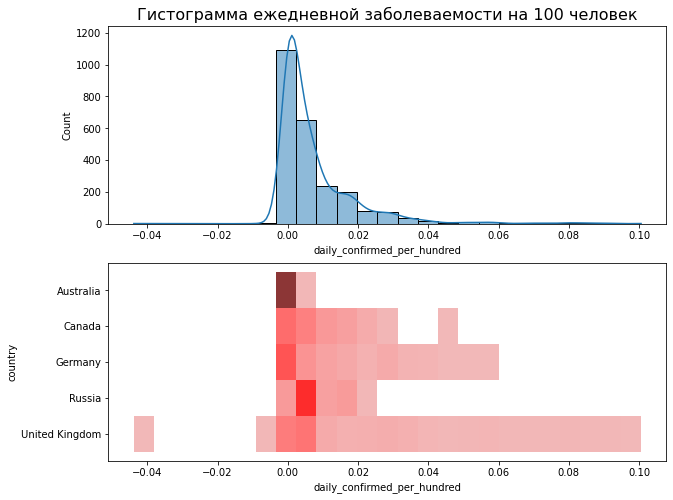

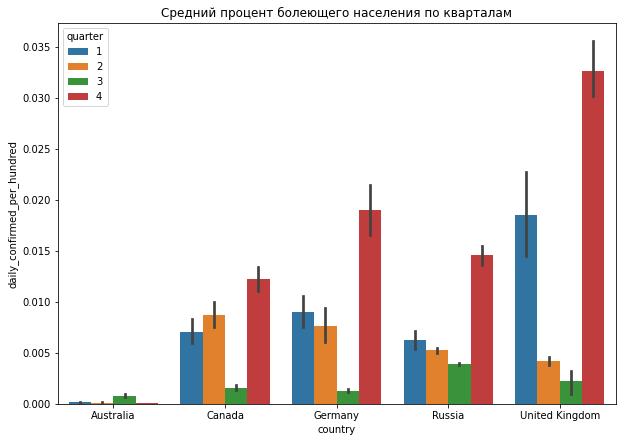

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
print(sns.__version__)
covid_df=pd.read_csv('data/covid_df.csv', sep=';')

countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()



'''     Гистограмма     '''

'''
        data — DataFrame, по которому строится график;
        x — признак, который будет отложен по оси абсцисс;
        y — признак, который будет отложен по оси ординат;
        hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);

        ax — система координат Matplotlib, в которой строится график;
        color — цвет графика;
        bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
        kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).
'''

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

'''         Многоуровневая столбчатая диаграмма         '''
croped_covid_df['date']=pd.to_datetime(croped_covid_df['date'])

fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

0.11.2


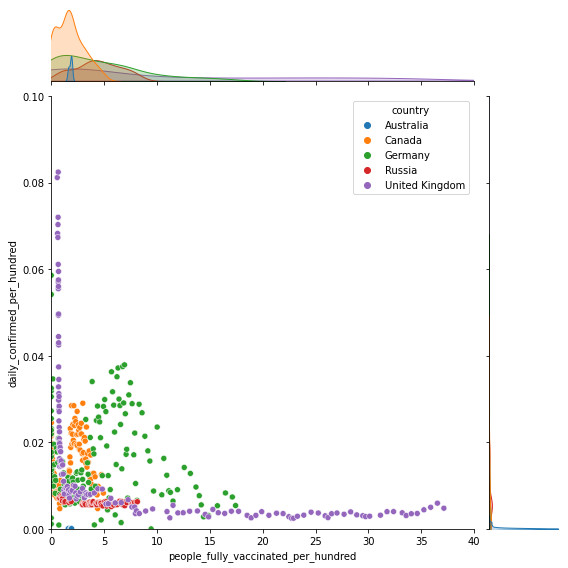

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
print(sns.__version__)
covid_df=pd.read_csv('data/covid_df.csv', sep=';')

'''     Совмещенные диаграмма рассеяния и гистограмма          '''


jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

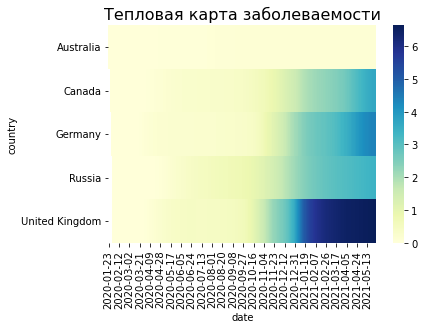

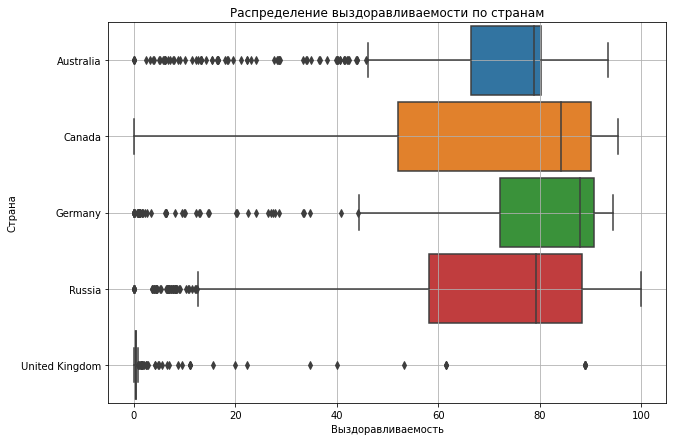

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
covid_df=pd.read_csv('data/covid_df.csv', sep=';')

countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])

croped_covid_df['confirmed_per_hundred']=croped_covid_df['confirmed']/croped_covid_df['population']*100



pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
#display(pivot)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16);


croped_covid_df['recover_rate']=croped_covid_df['recovered']/croped_covid_df['confirmed']*100


fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение выздоравливаемости по странам');
boxplot.set_xlabel('Выздоравливаемость');
boxplot.set_ylabel('Страна');
boxplot.grid()
#croped_covid_df.info()
